## Libraries

In [6]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from scipy.stats import uniform, randint, loguniform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data

In [2]:
stock_pumper_data = pd.read_csv("../data/combined_stock_pumper_dataset.csv")

# in case NA
stock_pumper_data = stock_pumper_data.dropna(subset=['Known_Pumper'])

## Create Train/Test/Split dataset

In [3]:
tfidf_features = stock_pumper_data.columns[stock_pumper_data.columns.str.islower()]  
other_features = ['Sentiment', 'num_mentioned_handles_lag_1', 'Close_lag_1', 'Volume']

columns_to_exclude = ['user.screen_name', 'id_str',"mentioned_handle_frequencies",'mentioned_handles', 'text', "mentioned_saamon2500_count",
"mentioned_yocchan60_count", "degree_pumper_interaction"]

#for col in stock_pumper_data.columns:
#    if "pumper" in col:
#        columns_to_exclude.append(col)


# Create a new DataFrame 'X' containing only the columns you want to use as features
# We use the .drop() method to remove the specified columns

# Fill NaNs with 0 or another imputation
X = stock_pumper_data[list(tfidf_features) + other_features].fillna(0)
X = X.drop(columns=columns_to_exclude, axis=1)
y = stock_pumper_data['Known_Pumper']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=69, stratify=y)

# Remove duplicate columns (keeping only the first occurrence)
X_train = X_train.loc[:, ~X_train.columns.duplicated()]
X_test = X_test.loc[:, ~X_test.columns.duplicated()]

numeric_features_to_scale = [
    'time_since_inflection',
    '1hr_tweet_count',
    '1day_tweet_count',
    'hour',
    'day_of_week',
    'month',
    'year',
    'degree_centrality',
    'betweenness_centrality',
    'eigenvector_centrality',
    'num_mentioned_handles',
    'sentiment_x_num_mentioned',
    'num_mentioned_handles_lag_1',
    'num_mentioned_handles_lag_2',
    'Sentiment',
    'Close_lag_1',
    'Volume'
]

# All other columns = TF-IDF or token features
all_features = X_train.columns.tolist()
tfidf_and_other_features = [f for f in all_features if f not in numeric_features_to_scale]

## Model training pipeline

Training and evaluating RandomForest...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters for RandomForest: {'classifier__criterion': 'entropy', 'classifier__max_depth': 23, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 283}
Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1944
           1       0.95      0.58      0.72        72

    accuracy                           0.98      2016
   macro avg       0.97      0.79      0.86      2016
weighted avg       0.98      0.98      0.98      2016

F1 Score for RandomForest: 0.7241
Precision for RandomForest: 0.9545
Recall for RandomForest: 0.5833
Accuracy for RandomForest: 0.9841



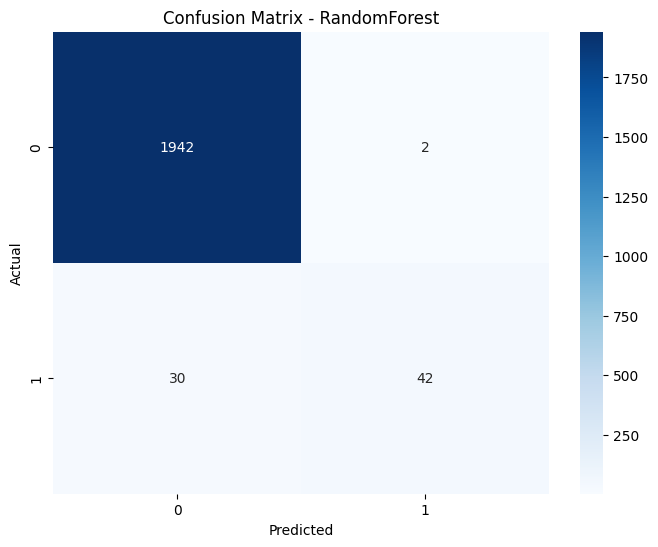

Training and evaluating LogisticRegression...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increas

Best parameters for LogisticRegression: {'classifier__C': 8.928211247983386, 'classifier__penalty': 'l2'}
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      1944
           1       0.17      0.82      0.28        72

    accuracy                           0.85      2016
   macro avg       0.58      0.84      0.60      2016
weighted avg       0.96      0.85      0.89      2016

F1 Score for LogisticRegression: 0.2810
Precision for LogisticRegression: 0.1695
Recall for LogisticRegression: 0.8194
Accuracy for LogisticRegression: 0.8502



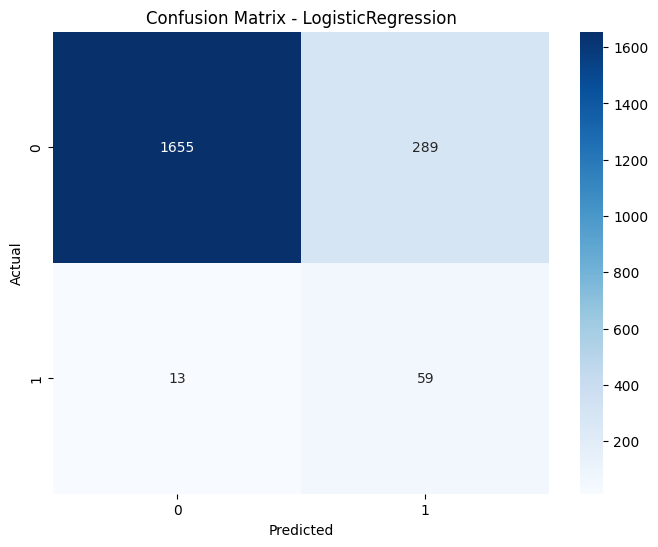

Training and evaluating XGBoost...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:18:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:18:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:18:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:18:03] WARN

Best parameters for XGBoost: {'classifier__colsample_bytree': 0.5666349377783161, 'classifier__learning_rate': 0.274061307605793, 'classifier__max_depth': 7, 'classifier__n_estimators': 182, 'classifier__subsample': 0.6578947997876096}
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1944
           1       0.96      0.75      0.84        72

    accuracy                           0.99      2016
   macro avg       0.98      0.87      0.92      2016
weighted avg       0.99      0.99      0.99      2016

F1 Score for XGBoost: 0.8438
Precision for XGBoost: 0.9643
Recall for XGBoost: 0.7500
Accuracy for XGBoost: 0.9901



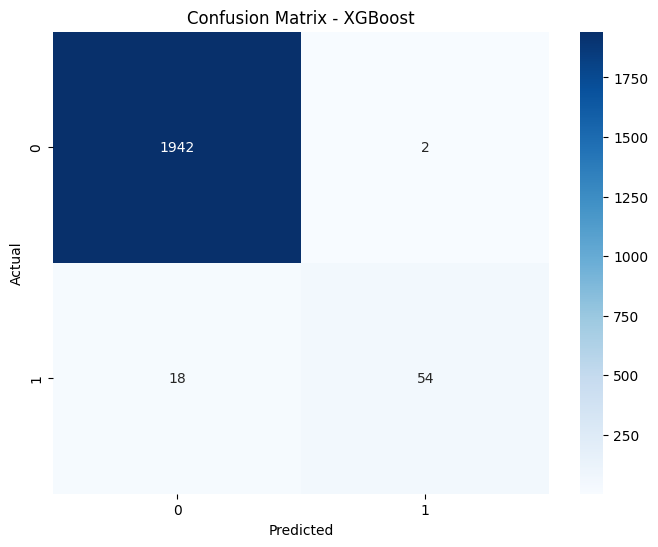

Training and evaluating LightGBM...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 192, number of negative: 5181[LightGBM] [Info] Number of positive: 192, number of negative: 5181

[LightGBM] [Info] Number of positive: 192, number of negative: 5182[LightGBM] [Info] Number of positive: 192, number of negative: 5181

[LightGBM] [Info] Number of positive: 192, number of negative: 5182
[LightGBM] [Info] Number of positive: 192, number of negative: 5181
[LightGBM] [Info] Number of positive: 192, number of negative: 5181
[LightGBM] [Info] Number of positive: 192, number of negative: 5181
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4038
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016005 sec

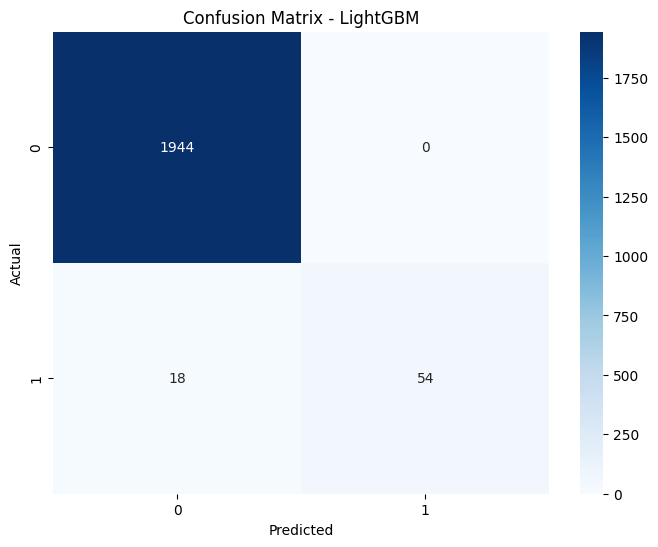

Training and evaluating SVM_RBF...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters for SVM_RBF: {'classifier__C': 9.448921233655929, 'classifier__gamma': 0.03915102294369988}
Classification Report for SVM_RBF:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1944
           1       0.32      0.68      0.44        72

    accuracy                           0.94      2016
   macro avg       0.65      0.81      0.70      2016
weighted avg       0.96      0.94      0.95      2016

F1 Score for SVM_RBF: 0.4356
Precision for SVM_RBF: 0.3203
Recall for SVM_RBF: 0.6806
Accuracy for SVM_RBF: 0.9370



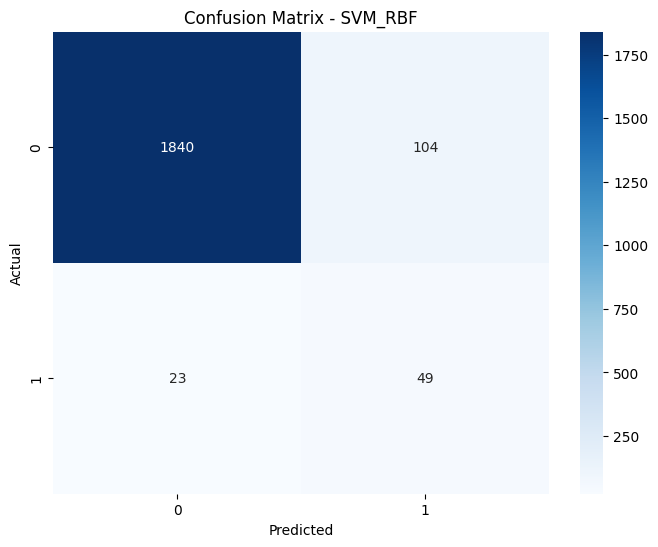

Training and evaluating GBM...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters for GBM: {'classifier__learning_rate': 0.10802810034208211, 'classifier__max_depth': 6, 'classifier__n_estimators': 215, 'classifier__subsample': 0.8897848877916041}
Classification Report for GBM:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1944
           1       0.96      0.72      0.83        72

    accuracy                           0.99      2016
   macro avg       0.98      0.86      0.91      2016
weighted avg       0.99      0.99      0.99      2016

F1 Score for GBM: 0.8254
Precision for GBM: 0.9630
Recall for GBM: 0.7222
Accuracy for GBM: 0.9891



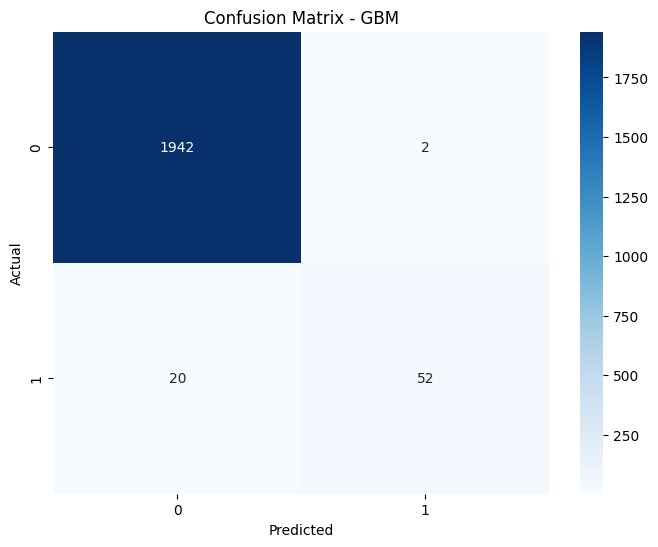

Training and evaluating ExtraTrees...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters for ExtraTrees: {'classifier__criterion': 'gini', 'classifier__max_depth': 22, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 335}
Classification Report for ExtraTrees:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1944
           1       0.94      0.44      0.60        72

    accuracy                           0.98      2016
   macro avg       0.96      0.72      0.80      2016
weighted avg       0.98      0.98      0.98      2016

F1 Score for ExtraTrees: 0.6038
Precision for ExtraTrees: 0.9412
Recall for ExtraTrees: 0.4444
Accuracy for ExtraTrees: 0.9792



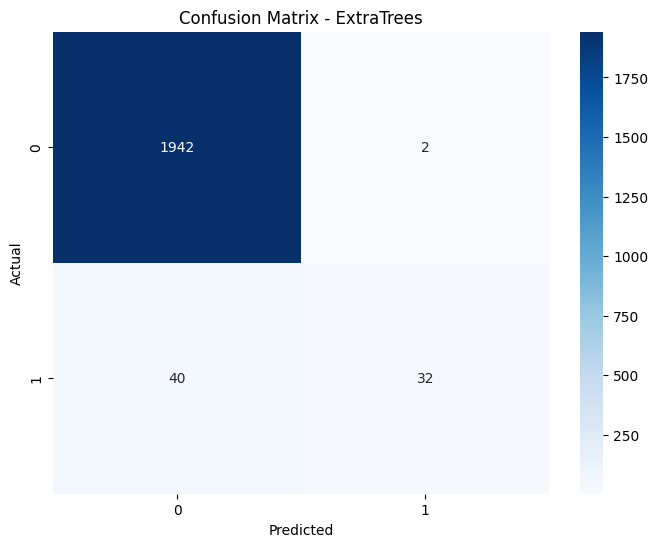

Training and evaluation complete!

--- Summary of Results ---
Model: RandomForest
  F1 Score: 0.7241
  Precision: 0.9545
  Recall: 0.5833
  Accuracy: 0.9841
  Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 23, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 283}
------------------------------
Model: LogisticRegression
  F1 Score: 0.2810
  Precision: 0.1695
  Recall: 0.8194
  Accuracy: 0.8502
  Best Parameters: {'classifier__C': 8.928211247983386, 'classifier__penalty': 'l2'}
------------------------------
Model: XGBoost
  F1 Score: 0.8438
  Precision: 0.9643
  Recall: 0.7500
  Accuracy: 0.9901
  Best Parameters: {'classifier__colsample_bytree': 0.5666349377783161, 'classifier__learning_rate': 0.274061307605793, 'classifier__max_depth': 7, 'classifier__n_estimators': 182, 'classifier__subsample': 0.6578947997876096}
------------------------------
Model: LightGBM
  F1 Score: 0.8571
  Precision: 1.0000
  Re

In [ ]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), [col for col in numeric_features_to_scale if col in X_train.columns]),
    ('tfidf', 'passthrough', [col for col in tfidf_and_other_features if col in X_train.columns])
], remainder='passthrough')

# Define the models and their parameter distributions for RandomizedSearchCV
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=69, n_jobs=-1),
        'params': {
            'classifier__n_estimators': randint(100, 400),
            'classifier__max_depth': [None] + list(randint(5, 30).rvs(5)),
            'classifier__min_samples_split': randint(2, 10),
            'classifier__min_samples_leaf': randint(1, 5),
            'classifier__criterion': ['gini', 'entropy']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(random_state=69, solver='liblinear', class_weight='balanced'),
        'params': {
            'classifier__C': loguniform(0.001, 10.0),
            'classifier__penalty': ['l1', 'l2']
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=69, use_label_encoder=False, eval_metric='logloss', n_jobs=-1),
        'params': {
            'classifier__n_estimators': randint(100, 400),
            'classifier__learning_rate': loguniform(0.01, 0.3),
            'classifier__max_depth': randint(3, 8),
            'classifier__subsample': uniform(0.01, 0.99),
            'classifier__colsample_bytree': uniform(0.01, 0.99)
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(random_state=69, n_jobs=-1),
        'params': {
            'classifier__n_estimators': randint(100, 400),
            'classifier__learning_rate': loguniform(0.01, 0.3),
            'classifier__max_depth': randint(3, 8),
            'classifier__num_leaves': randint(20, 100),
            'classifier__subsample': uniform(0.01, 0.99),
            'classifier__colsample_bytree': uniform(0.01, 0.99)
        }
    },
    'SVM_RBF': {
        'model': SVC(random_state=69, kernel='rbf', class_weight='balanced'),
        'params': {
            'classifier__C': loguniform(0.1, 10.0),
            'classifier__gamma': loguniform(0.001, 1.0)
        }
    },
    'GBM': {
        'model': GradientBoostingClassifier(random_state=69),
        'params': {
            'classifier__n_estimators': randint(100, 400),
            'classifier__learning_rate': uniform(0.01, 0.2),
            'classifier__max_depth': randint(3, 8),
            'classifier__subsample': uniform(0.01, 0.99)
        }
    },
    'ExtraTrees': {
        'model': ExtraTreesClassifier(random_state=69, n_jobs=-1),
        'params': {
            'classifier__n_estimators': randint(100, 400),
            'classifier__max_depth': [None] + list(randint(5, 30).rvs(5)),
            'classifier__min_samples_split': randint(2, 10),
            'classifier__min_samples_leaf': randint(1, 5),
            'classifier__criterion': ['gini', 'entropy']
        }
    }
}

# Dictionary to store the best models and results
best_models = {}
results = {}

# Iterate through each model
for name, model_info in models.items():
    print(f"Training and evaluating {name}...")
    model = model_info['model']
    params = model_info['params']

    # Create the pipeline
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])

    # Perform RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=params,
        n_iter=50,  # Adjust as needed
        scoring='f1',
        cv=3,
        verbose=1,
        n_jobs=-1,
        random_state=69,
        error_score='raise'
    )

    random_search.fit(X_train, y_train)

    # Store the best model
    best_models[name] = random_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_models[name].predict(X_test)

    # Evaluate the model
    report = classification_report(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'best_params': random_search.best_params_,
        'classification_report': report,
        'f1_score': f1,
        'precision': precision,
        'recall': recall,
        'accuracy': accuracy,
        'confusion_matrix': cm
    }

    print(f"Best parameters for {name}: {random_search.best_params_}")
    print(f"Classification Report for {name}:\n{report}")
    print(f"F1 Score for {name}: {f1:.4f}")
    print(f"Precision for {name}: {precision:.4f}")
    print(f"Recall for {name}: {recall:.4f}")
    print(f"Accuracy for {name}: {accuracy:.4f}\n")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

print("Training and evaluation complete!")
print("\n--- Summary of Results ---")
for name, result in results.items():
    print(f"Model: {name}")
    print(f"  F1 Score: {result['f1_score']:.4f}")
    print(f"  Precision: {result['precision']:.4f}")
    print(f"  Recall: {result['recall']:.4f}")
    print(f"  Accuracy: {result['accuracy']:.4f}")
    print(f"  Best Parameters: {result['best_params']}")
    print("-" * 30)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from scipy.stats import uniform, randint, loguniform
import pandas as pd

# Assuming you have X_train, y_train, X_test, y_test and your feature lists
# numeric_features_to_scale
# tfidf_and_other_features

# Define the preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), [col for col in numeric_features_to_scale if col in X_train.columns]),
    ('tfidf', 'passthrough', [col for col in tfidf_and_other_features if col in X_train.columns])
], remainder='passthrough')

# Define the models and their parameter distributions for RandomizedSearchCV
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=69, n_jobs=-1),
        'params': {
            'classifier__n_estimators': randint(100, 400),
            'classifier__max_depth': [None] + list(randint(5, 30).rvs(5)),
            'classifier__min_samples_split': randint(2, 10),
            'classifier__min_samples_leaf': randint(1, 5),
            'classifier__criterion': ['gini', 'entropy']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(random_state=69, solver='liblinear', class_weight='balanced'),
        'params': {
            'classifier__C': loguniform(0.001, 10.0),
            'classifier__penalty': ['l1', 'l2']
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=69, use_label_encoder=False, eval_metric='logloss', n_jobs=-1),
        'params': {
            'classifier__n_estimators': randint(100, 400),
            'classifier__learning_rate': loguniform(0.01, 0.3),
            'classifier__max_depth': randint(3, 8),
            'classifier__subsample': uniform(0.01, 0.99),
            'classifier__colsample_bytree': uniform(0.01, 0.99)
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(random_state=69, n_jobs=-1),
        'params': {
            'classifier__n_estimators': randint(100, 400),
            'classifier__learning_rate': loguniform(0.01, 0.3),
            'classifier__max_depth': randint(3, 8),
            'classifier__num_leaves': randint(20, 100),
            'classifier__subsample': uniform(0.01, 0.99),
            'classifier__colsample_bytree': uniform(0.01, 0.99)
        }
    },
    'SVM_RBF': {
        'model': SVC(random_state=69, kernel='rbf', class_weight='balanced'),
        'params': {
            'classifier__C': loguniform(0.1, 10.0),
            'classifier__gamma': loguniform(0.001, 1.0)
        }
    },
    'GBM': {
        'model': GradientBoostingClassifier(random_state=69),
        'params': {
            'classifier__n_estimators': randint(100, 400),
            'classifier__learning_rate': uniform(0.01, 0.2),
            'classifier__max_depth': randint(3, 8),
            'classifier__subsample': uniform(0.01, 0.99)
        }
    },
    'ExtraTrees': {
        'model': ExtraTreesClassifier(random_state=69, n_jobs=-1),
        'params': {
            'classifier__n_estimators': randint(100, 400),
            'classifier__max_depth': [None] + list(randint(5, 30).rvs(5)),
            'classifier__min_samples_split': randint(2, 10),
            'classifier__min_samples_leaf': randint(1, 5),
            'classifier__criterion': ['gini', 'entropy']
        }
    }
}

# Dictionary to store the best models and results
best_models = {}
results = {}

# Iterate through each model
for name, model_info in models.items():
    print(f"Training and evaluating {name}...")
    model = model_info['model']
    params = model_info['params']

    # Create the pipeline
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])

    # Perform RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=params,
        n_iter=50,  # Adjust as needed
        scoring='f1',
        cv=3,
        verbose=1,
        n_jobs=-1,
        random_state=69,
        error_score='raise'
    )

    random_search.fit(X_train, y_train)

    # Store the best model
    best_models[name] = random_search.best_estimator_

    # Make predictions on the training and test sets
    y_train_pred = best_models[name].predict(X_train)
    y_test_pred = best_models[name].predict(X_test)

    # Evaluate the model on the training and test sets
    train_report = classification_report(y_train, y_train_pred, zero_division=0)
    test_report = classification_report(y_test, y_test_pred, zero_division=0)

    train_cm = confusion_matrix(y_train, y_train_pred)
    test_cm = confusion_matrix(y_test, y_test_pred)

    results[name] = {
        'best_params': random_search.best_params_,
        'train_classification_report': train_report,
        'test_classification_report': test_report,
        'train_confusion_matrix': train_cm,
        'test_confusion_matrix': test_cm
    }

    print(f"Best parameters for {name}: {random_search.best_params_}")
    print(f"Training Classification Report for {name}:\n{train_report}")
    print(f"Test Classification Report for {name}:\n{test_report}")
    print(f"Training Confusion Matrix for {name}:\n{train_cm}")
    print(f"Test Confusion Matrix for {name}:\n{test_cm}\n")


Training and evaluating RandomForest...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters for RandomForest: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 9, 'classifier__n_estimators': 171}
Training Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7772
           1       1.00      0.83      0.90       288

    accuracy                           0.99      8060
   macro avg       1.00      0.91      0.95      8060
weighted avg       0.99      0.99      0.99      8060

Test Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1944
           1       0.95      0.54      0.69        72

    accuracy                           0.98      2016
   macro avg       0.97      0.77      0.84      2016

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increas

Best parameters for LogisticRegression: {'classifier__C': 8.928211247983386, 'classifier__penalty': 'l2'}
Training Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      7772
           1       0.21      0.93      0.34       288

    accuracy                           0.87      8060
   macro avg       0.60      0.90      0.64      8060
weighted avg       0.97      0.87      0.91      8060

Test Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      1944
           1       0.17      0.82      0.28        72

    accuracy                           0.85      2016
   macro avg       0.58      0.84      0.60      2016
weighted avg       0.96      0.85      0.89      2016

Training Confusion Matrix for LogisticRegression:
[[6754 1018]
 [  19  269]]
Test Confusion Matrix for LogisticRegression:
[[1655  289

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:36:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:36:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:36:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:36:32] WARN

Best parameters for XGBoost: {'classifier__colsample_bytree': 0.5666349377783161, 'classifier__learning_rate': 0.274061307605793, 'classifier__max_depth': 7, 'classifier__n_estimators': 182, 'classifier__subsample': 0.6578947997876096}
Training Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7772
           1       1.00      0.99      0.99       288

    accuracy                           1.00      8060
   macro avg       1.00      0.99      1.00      8060
weighted avg       1.00      1.00      1.00      8060

Test Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1944
           1       0.96      0.75      0.84        72

    accuracy                           0.99      2016
   macro avg       0.98      0.87      0.92      2016
weighted avg       0.99      0.99      0.99      2016

Training Confusion Matrix 

In [13]:
print("Training and evaluation complete!")
print("\n--- Summary of Results ---")
for name, result in results.items():
    print(f"Model: {name}")
    print(f"  Best Parameters: {result['best_params']}")
    print(f"  Training Classification Report:\n{result['train_classification_report']}")
    print(f"  Test Classification Report:\n{result['test_classification_report']}")
    print(f"  Training Confusion Matrix:\n{result['train_confusion_matrix']}")
    print(f"  Test Confusion Matrix:\n{result['test_confusion_matrix']}")
    print("-" * 30)

Training and evaluation complete!

--- Summary of Results ---
Model: RandomForest
  Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 9, 'classifier__n_estimators': 171}
  Training Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7772
           1       1.00      0.83      0.90       288

    accuracy                           0.99      8060
   macro avg       1.00      0.91      0.95      8060
weighted avg       0.99      0.99      0.99      8060

  Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1944
           1       0.95      0.54      0.69        72

    accuracy                           0.98      2016
   macro avg       0.97      0.77      0.84      2016
weighted avg       0.98      0.98      0.98      2016

  Trainin

## Saving models

In [14]:
import joblib

# Assuming 'best_models' dictionary is available from the previous code chunk
# and contains the trained models

if 'best_models' in locals(): # Check if best_models exists
    for model_name, model in best_models.items():
        joblib.dump(model, f'models/{model_name}_model.joblib')
        print(f"{model_name} model saved to {model_name}_model.joblib")
else:
    print("Error: 'best_models' dictionary not found. Please run the training code chunk first.")

RandomForest model saved to RandomForest_model.joblib
LogisticRegression model saved to LogisticRegression_model.joblib
XGBoost model saved to XGBoost_model.joblib
LightGBM model saved to LightGBM_model.joblib
SVM_RBF model saved to SVM_RBF_model.joblib
GBM model saved to GBM_model.joblib
ExtraTrees model saved to ExtraTrees_model.joblib


## Reusing models

In [10]:
# loaded_rf = joblib.load('models/RandomForest_model.joblib')